<a href="https://colab.research.google.com/github/MYoussef885/Car-Traffic-Recognition-in-Images/blob/main/car_traffic_detection_best_one_mashallah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import imutils

In [ ]:
# Read the traffic image
img = cv2.imread("traffic1.jpeg")

In [ ]:
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
# Apply bilateral filter
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)

In [ ]:
# Perform Canny edge detection
edged = cv2.Canny(bfilter, 30, 200)

In [ ]:
# Find contours
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)

cars_contours = []  # Create a list to store identified car contours

for contour in contours:
  perimeter = cv2.arcLength(contour, True)
  approx = cv2.approxPolyDP(contour, 0.02 * perimeter, True)  # Adjust epsilon value for more accurate approximation
  if len(approx) > 10:  # Adjust the minimum number of vertices to identify cars
    cars_contours.append(contour)


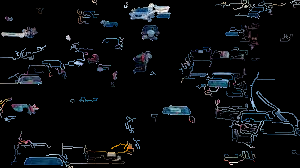

In [ ]:
car_area_mask = np.zeros(gray.shape, np.uint8)  # Create a mask for the car areas

cv2.drawContours(car_area_mask, cars_contours, -1, 255, -1)  # Draw contours on the mask

# Apply the mask to the original image
car_area_image = cv2.bitwise_and(img, img, mask=car_area_mask)

# Display the car areas image
cv2_imshow(car_area_image)

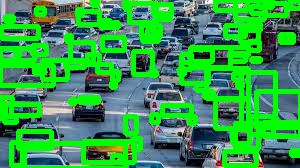

In [ ]:
# Example: Draw bounding boxes around the detected car areas
for contour in cars_contours:
  (x, y, w, h) = cv2.boundingRect(contour)
  res = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Display the result with bounding boxes around car areas
cv2_imshow(res)